# <img align="absmiddle" alt='ESO Logo' src='http://archive.eso.org/i/esologo.png'> &nbsp; TAP queries to the <cite>asm.meteo_paranal</tt> table

Little illustration on how to query for relative humidity, pressure, temperature, wind speed and direction of a given night at Paranal.

In [1]:
# Initialisations
import os 
import sys

import pyvo
import requests
#import cgi
import numpy as np

from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt

#import pandas

from astropy import table
from astropy.coordinates import SkyCoord
from astropy.units import Quantity

from pyvo.dal import tap

# The ESO TAP service offering ASM data tables:
ESO_TAP_OBS = "https://archive.eso.org/tap_obs"

# Instantiate the tap service:
tapobs = tap.TAPService(ESO_TAP_OBS)

In [2]:
# Note: The names of the fields of the ASM  do not coincide with the column names in the TAP table.
# Let's check the column names, units, and descriptions of the "asm.meteo_paranal" table:

query = "SELECT column_name, unit, description FROM TAP_SCHEMA.columns where table_name='asm.meteo_paranal' order by 1"
res = tapobs.search(query=query)
res.to_table().show_in_notebook(show_row_index=False)

         interactive tables it is recommended to use dedicated tools like:
         - https://github.com/bloomberg/ipydatagrid
         - https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html#datatable
         - https://dash.plotly.com/datatable [warnings]


In [3]:
# The following code queries for the average temperature, relative humidity, wind direction and speed at 30m over the Paranal platform
# the instantaneous pressure 0m over the platform, and the average relativhe humidity at 2m,
# in a given interval of time (start_date).

query = """select start_date, temp_30m, rhum_30m, rhum_2m, rain_m20m, 
                  press_0m_inst, wind_dir_30m, wind_speed_30m
           from asm.meteo_paranal
           where start_date between '2025-05-01T21:00:00' and '2025-05-02T10:00:00'
        """

res = tapobs.search(query=query)

print(res.to_table()) # to_table() turns the "res" pyvo table in a astropy table, nicer to print out.


     start_date      temp_30m rhum_30m ... wind_dir_30m wind_speed_30m
                     Celsius     %     ...     deg        m.s**(-1)   
-------------------- -------- -------- ... ------------ --------------
2025-05-01T21:00:41Z    14.78       15 ...          346           8.43
2025-05-01T21:01:41Z    14.76       16 ...          341           7.88
2025-05-01T21:02:41Z    14.72       15 ...          358           8.57
2025-05-01T21:03:43Z    14.76       16 ...          344           7.63
2025-05-01T21:04:43Z    14.74       17 ...          341           8.07
2025-05-01T21:05:43Z    14.76       15 ...          346           9.05
2025-05-01T21:06:43Z    14.71       16 ...          345            8.9
2025-05-01T21:07:42Z    14.66       15 ...          348           9.48
2025-05-01T21:08:43Z    14.67       18 ...          344           9.25
                 ...      ...      ... ...          ...            ...
2025-05-02T09:50:41Z    14.85       13 ...            2            4.9
2025-0

Text(0.5, 0, 'm/s')

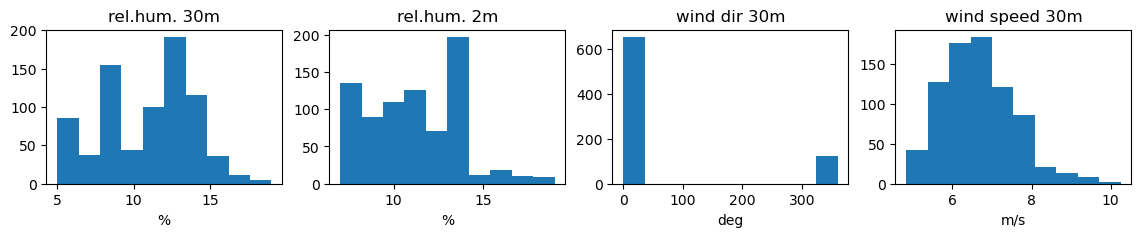

In [4]:
# Histograms of rel.humidity at 30m and 2m, and of the wind direction and speed
fig, axs = plt.subplots(1, 4) #, tight_layout=True)
fig.set_size_inches(14, 2)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(res['rhum_30m'], bins=10)
_, bins2, patches2 = axs[1].hist(res['rhum_2m'], bins=10)
_, _, _ = axs[2].hist(res['wind_dir_30m'], bins=10)
_, _, _ = axs[3].hist(res['wind_speed_30m'], bins=10) 

axs[0].set_title('rel.hum. 30m')
axs[1].set_title('rel.hum. 2m')
axs[2].set_title('wind dir 30m')
axs[3].set_title('wind speed 30m')
axs[0].set_xlabel('%')
axs[1].set_xlabel('%')
axs[2].set_xlabel('deg')
axs[3].set_xlabel(r'm/s') 